<a href="https://colab.research.google.com/github/matheustoneti/MachinePredictiveMaintenanceClassification/blob/main/Machine_Predictive_Maintenance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
dados = pd.read_csv('predictive_maintenance.csv')

In [ ]:
dados.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [ ]:
dados = dados.drop(['Product ID'], axis=1)

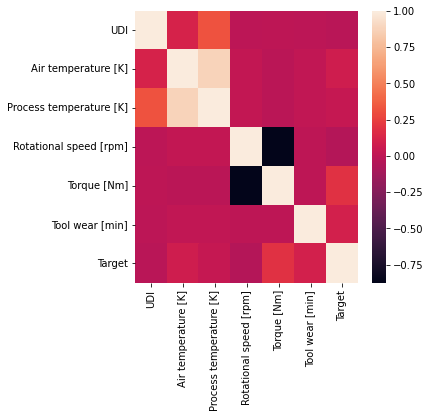

In [ ]:
axe, fig = plt.subplots(figsize = (5,5))
axe = sns.heatmap(dados.corr())

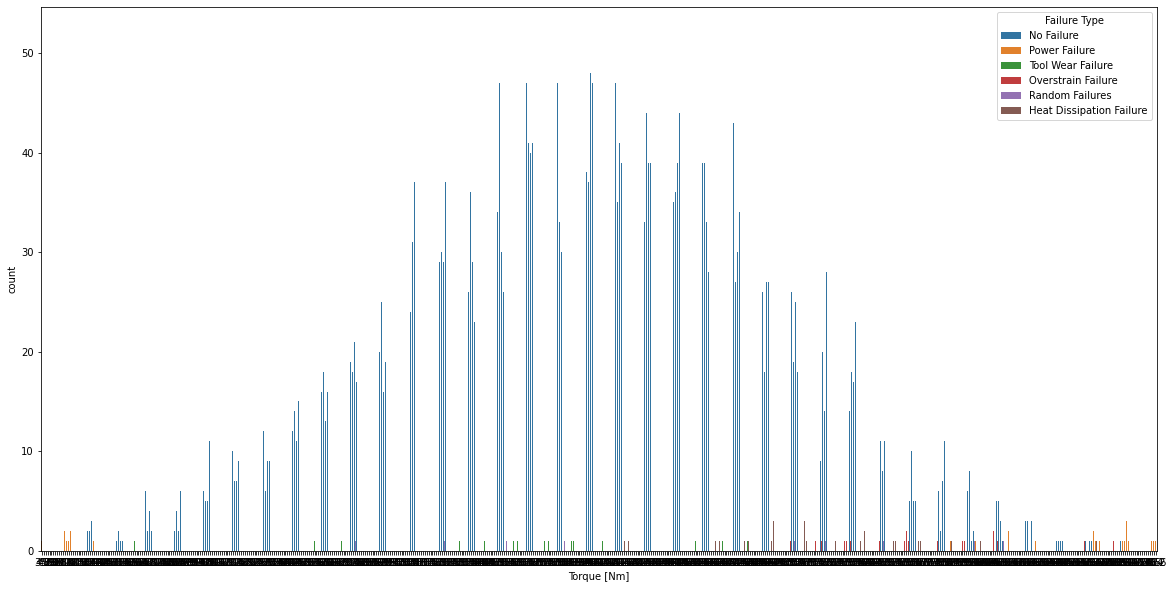

In [ ]:
axe, fig = plt.subplots(figsize = (20,10))
axe = sns.countplot(x= dados['Torque [Nm]'], hue = dados['Failure Type'])

In [ ]:
dados_pair_plot = dados[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']]

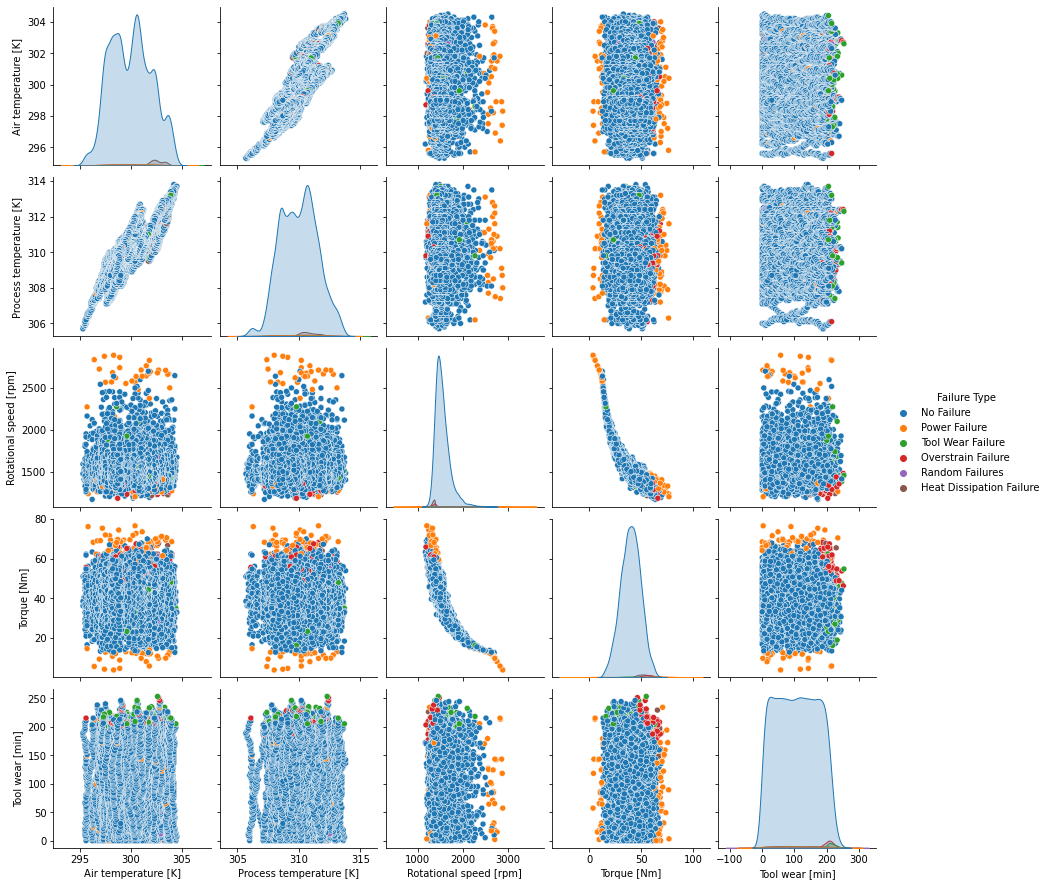

In [ ]:
sns.pairplot(data = dados_pair_plot, hue = 'Failure Type')

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
dados['Type'] = le.fit_transform(dados['Type'])
dados['Failure Type'] = le.fit_transform(dados['Failure Type'])

In [ ]:
dados.head(10)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,2,298.1,308.6,1551,42.8,0,0,1
1,2,1,298.2,308.7,1408,46.3,3,0,1
2,3,1,298.1,308.5,1498,49.4,5,0,1
3,4,1,298.2,308.6,1433,39.5,7,0,1
4,5,1,298.2,308.7,1408,40.0,9,0,1
5,6,2,298.1,308.6,1425,41.9,11,0,1
6,7,1,298.1,308.6,1558,42.4,14,0,1
7,8,1,298.1,308.6,1527,40.2,16,0,1
8,9,2,298.3,308.7,1667,28.6,18,0,1
9,10,2,298.5,309.0,1741,28.0,21,0,1


In [ ]:
y = dados['Target']
x = dados.drop(['Target'], axis = 1)

In [ ]:
x.head(10)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,2,298.1,308.6,1551,42.8,0,1
1,2,1,298.2,308.7,1408,46.3,3,1
2,3,1,298.1,308.5,1498,49.4,5,1
3,4,1,298.2,308.6,1433,39.5,7,1
4,5,1,298.2,308.7,1408,40.0,9,1
5,6,2,298.1,308.6,1425,41.9,11,1
6,7,1,298.1,308.6,1558,42.4,14,1
7,8,1,298.1,308.6,1527,40.2,16,1
8,9,2,298.3,308.7,1667,28.6,18,1
9,10,2,298.5,309.0,1741,28.0,21,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = (0.3))

In [ ]:
modelo = GradientBoostingClassifier()

In [ ]:
modelo = modelo.fit(x_train, y_train)

In [ ]:
accuracy = modelo.score(x_test, y_test)

In [ ]:
print(accuracy)

0.9976666666666667


### Modelo preditivo com 99.77% de acurácia. 